In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # determine the optimal value of k
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df = pd.read_excel('/content/sample_data/Superstore.xlsx')

# remove columns
df = df.drop(columns=['Row ID', 'Order ID', 'Customer Name', 'Product ID', 'Product Name'])#not relevant for clustering.

# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])#easily and accurately work with and analyze dates.
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create new features: Total Sales and Recency
df['Total Sales'] = df['Quantity'] * df['Sales']
df['Recency'] = (df['Order Date'].max() - df['Order Date']).dt.days #Customer's Last Purchase


In [ ]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Total Sales', 'Recency'],
      dtype='object')

In [ ]:
#better clustering results by normalizing feature values.
features = df[['Recency', 'Quantity', 'Total Sales', 'Discount', 'Profit']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)#text to number


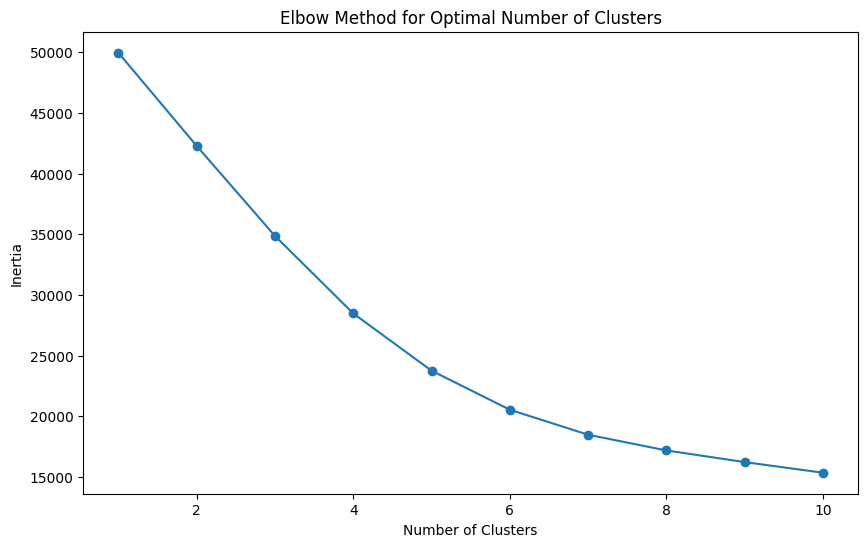

In [ ]:
# Determine the optimal number of clusters using the Elbow method
import warnings
warnings.filterwarnings("ignore")
inertia = []#measure how data are cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Add cluster centers to the dataframe for analysis
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)


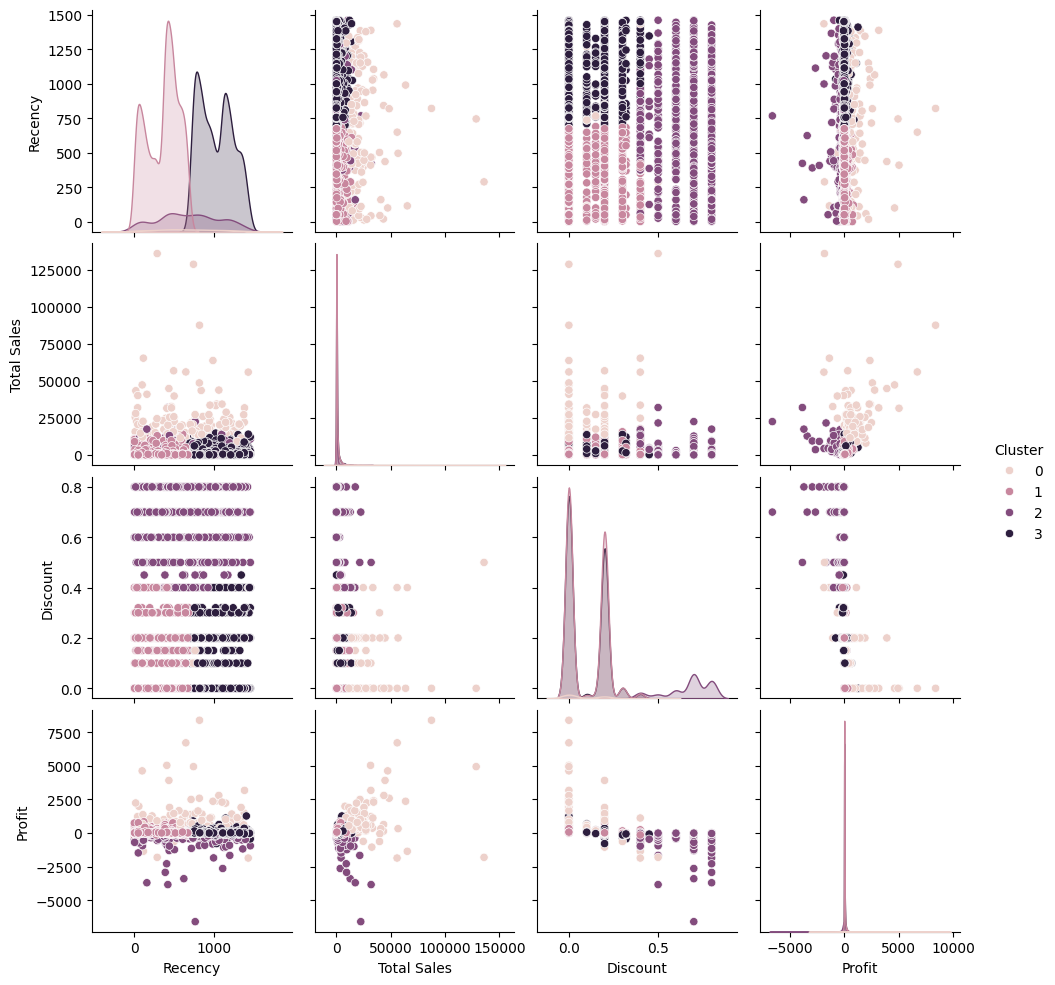

In [ ]:
#ploting
sns.pairplot(df, hue='Cluster', vars=['Recency', 'Total Sales', 'Discount', 'Profit'])
plt.show()

# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Quantity': 'mean',
    'Total Sales': 'mean',
    'Discount': 'mean',
    'Profit': 'mean'
}).reset_index()



In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.29
